<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminaries</a></span></li><li><span><a href="#Visualising-Poisson-Point-Processes" data-toc-modified-id="Visualising-Poisson-Point-Processes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualising Poisson Point Processes</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Example-1:-Web-Server" data-toc-modified-id="Example-1:-Web-Server-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Example 1: Web Server</a></span></li><li><span><a href="#Example-2:-Flood-Events" data-toc-modified-id="Example-2:-Flood-Events-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Example 2: Flood Events</a></span></li><li><span><a href="#Example-3:-School-Traffic" data-toc-modified-id="Example-3:-School-Traffic-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Example 3: School Traffic</a></span></li><li><span><a href="#Example-4:-Frequent-Events" data-toc-modified-id="Example-4:-Frequent-Events-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Example 4: Frequent Events</a></span></li></ul></li><li><span><a href="#Q-Q-Plot" data-toc-modified-id="Q-Q-Plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Q-Q Plot</a></span></li><li><span><a href="#Kolmogorov-Smirnov-Test" data-toc-modified-id="Kolmogorov-Smirnov-Test-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Kolmogorov-Smirnov Test</a></span></li><li><span><a href="#The-Poisson-Distribution" data-toc-modified-id="The-Poisson-Distribution-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>The Poisson Distribution</a></span><ul class="toc-item"><li><span><a href="#Simulating-the-Poisson-Distribution" data-toc-modified-id="Simulating-the-Poisson-Distribution-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Simulating the Poisson Distribution</a></span></li><li><span><a href="#Test-Runs" data-toc-modified-id="Test-Runs-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Test Runs</a></span></li><li><span><a href="#Visualisation-the-Results-of-the-Simulation" data-toc-modified-id="Visualisation-the-Results-of-the-Simulation-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Visualisation the Results of the Simulation</a></span></li></ul></li><li><span><a href="#Impact-of-Unit-of-Measurements" data-toc-modified-id="Impact-of-Unit-of-Measurements-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Impact of Unit of Measurements</a></span><ul class="toc-item"><li><span><a href="#Measuring-Meteor-showers-in-minutes" data-toc-modified-id="Measuring-Meteor-showers-in-minutes-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Measuring Meteor showers in minutes</a></span></li><li><span><a href="#Measuring-Meteor-showers-in-hours" data-toc-modified-id="Measuring-Meteor-showers-in-hours-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Measuring Meteor showers in hours</a></span></li></ul></li><li><span><a href="#Applications-to-the-initial-problems" data-toc-modified-id="Applications-to-the-initial-problems-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Applications to the initial problems</a></span><ul class="toc-item"><li><span><a href="#Web-Server" data-toc-modified-id="Web-Server-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Web Server</a></span></li><li><span><a href="#Flood-Events" data-toc-modified-id="Flood-Events-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Flood Events</a></span></li><li><span><a href="#School-Car-Traffic" data-toc-modified-id="School-Car-Traffic-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>School Car Traffic</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Preliminaries

In [1]:
import pandas as pd

import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm 

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import math
import random 
import statistics 

# Visualising Poisson Point Processes

The `poissonEvents(λ,N,T)` method visualises the a random poisson process and returns a list of the event times. Two of the parameters `λ`, `N` and `T` must be set. 

The parameter `plot=False` can be used to surpress the plotting. In this case the method just returns the list of event times.

In [2]:
# random.seed(1)
# poissonSimulation(2.0, T=40, K=10, N=5000)

<div class="alert alert-block alert-info">
<b>Hint:</b> 
The code depends on random numbers generated by the system. Hence the values generated and accordingly the graph will look differently everytime you run the method. If reproducibility is of any importance, set an arbitrary seed value immediately before calling the method.</div>

<div class="alert alert-block alert-info">
<b>Hint:</b> 
You can skip this code. It just uses some Python trickery to generate the required plot.</div>

In [3]:
def poissonEvents(λ=None, N=None, T=None, 
                  plot=True, events=None, figsize=None):

    if events!=None:
        N = len(events)
        
    if N!=None and T==None and λ!=None:
        T = int(N/λ)
    elif N==None and T!=None and λ!=None:
        N = int(λ*T)
    elif N!=None and T!=None and λ==None:
        λ = N/T
    
   
    if events==None:
        u = [ random.uniform(0, 1) for i in range(N) ]
        P = list(np.cumsum(list(map(
                lambda x: -math.log(1-x)/λ, u))))
    else:
        P = events
        
    if plot:
  
        if figsize!=None:
            width, height = figsize
        else:
            width, height = 10, 6
            
        fig, ax=plt.subplots(1,1)
        fig.set_figwidth(width)
        fig.set_figheight(height)
        
        def X(l):
            
            xmax = max(int(N/λ),math.ceil(max(l)))
            
            def double(l):
                return [] if l==[] \
                        else [l[0], l[0]]+double(l[1:])
    
            return [0]+double(l)+[xmax]
        
        def Y(l):
    
            def steps(l, n):
                return [] if l==[] \
                        else [n, n]+steps(l[1:], n+1)
    
            return [0, 0]+steps(l, 1)
    
        x = X(P)
        y = Y(P)

        ax.set_title(f"Poisson Process λ={λ:5.3f} n={N:d}")
        ax.set_xlim(min(x), max(x))
        ax.set_ylim(min(y), max(y))
        ax.yaxis.set_major_locator(
            mpl.ticker.MaxNLocator(integer=True))
        ax.plot(x, y, lw=3)
        ax.plot(x, list(map(lambda x:λ*x, x)))
        ax.grid(True)
        
    return P

# Introduction

A Poisson Process is a model for a series of discrete event where the average time between events is known, but the exact timing of events is random. 

## Example 1: Web Server

For example, suppose we own a website which our service provider tells us goes down on average once per 60 days, but one failure doesn’t affect the probability of the next. All we know is the average time between failures. This is a Poisson process that looks like:

In [4]:
random.seed(41)
failure=poissonEvents(λ=1/60, N=10, plot=False)

The server breaks down on days:

In [5]:
failure

[28.781005903690197,
 44.51895843092672,
 55.41291312348965,
 202.5012961804081,
 254.25762531280895,
 324.55428530760094,
 372.8740702157703,
 401.90017621449977,
 480.82220020908005,
 532.3641004498589]

We normalise this to int:

In [6]:
list(map(int, failure))

[28, 44, 55, 202, 254, 324, 372, 401, 480, 532]

The time between crashes (in days) is:

In [7]:
np.diff(failure)

array([ 15.73795253,  10.89395469, 147.08838306,  51.75632913,
        70.29665999,  48.31978491,  29.026106  ,  78.92202399,
        51.54190024])

In [8]:
list(map(int, np.diff(failure)))

[15, 10, 147, 51, 70, 48, 29, 78, 51]

The average time (in days) between failures is:

In [9]:
int(np.mean(np.diff(failure)))

55

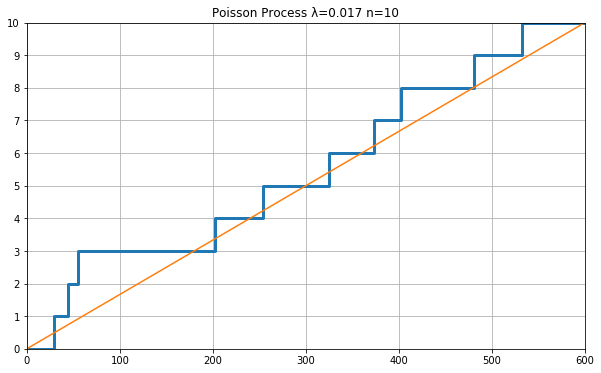

In [10]:
_ = poissonEvents(events=failure, λ=1/60)

## Example 2: Flood Events

When a flood event is statistically expected once every generation, it can become a "hundred year" event, and then suddenly it starts raining badly and it can happen three times in very short sequence...

[78.10862137857657, 151.93860874856318, 153.3939427349944, 155.61122592224365]

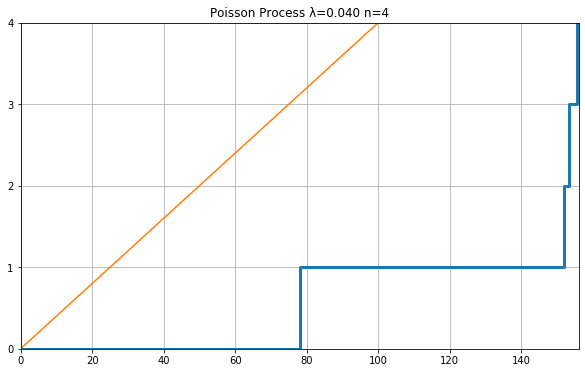

In [11]:
random.seed(2)
floods=poissonEvents(N=4, T=100)
floods

## Example 3: School Traffic

10 minutes to 9a.m. the traffic in front of the school building increases to 5 cars per minute...

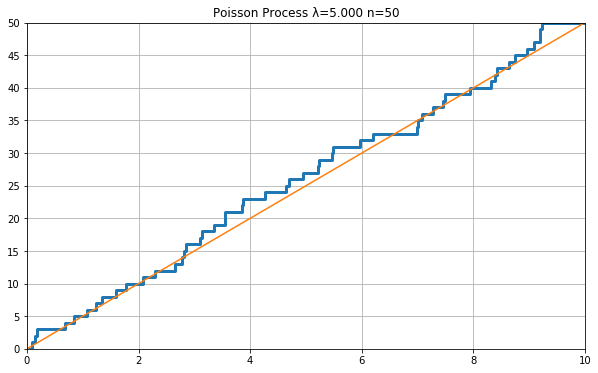

In [12]:
random.seed(41)
pp=poissonEvents(λ=5, T=10)

## Example 4: Frequent Events

For large values of N it becomes apparent that the events are evenly distributed with `λ` events per unit of time.

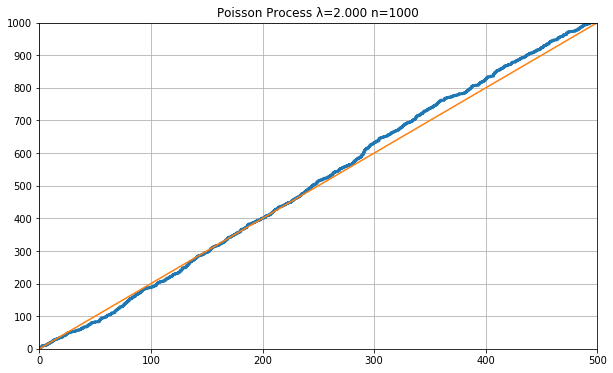

In [13]:
random.seed(3)
pp=poissonEvents(λ=2, N=1000)

# Q-Q Plot

The Q-Q-Plot is graphical test to check if the quantiles of a given sample follow the same distribution as 
a given reference distribution. We compare the event times against the uniform distribution:

In [14]:
N=5000
λ = 2.0

random.seed(2)

u = [ random.uniform(0, 1) for i in range(N) ]
P = list(np.cumsum(list(map(lambda x: -math.log(x)/λ, u))))

dp=pd.DataFrame()
dp['Data']=pd.Series(P).values

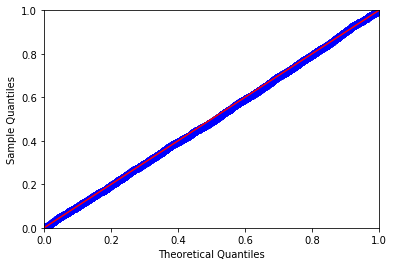

In [15]:
fig, ax=plt.subplots(1,1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
#fig.set_figwidth(10)
#fig.set_figheight(10)
sm.qqplot(dp, dist=stats.uniform, fit=True, line='45', ax=ax) 
plt.show()

This demonstrates clearly that the events are evenly distributed.

# Kolmogorov-Smirnov Test

The Kolmogorov-Smirnov Test can be used to check if a given sample is of a given reference distribution 
[NIST](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35g.htm)
[Wikipedia](https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test)

In [16]:
N=1000
λ = 2.0

random.seed(2)

u = [ random.uniform(0, 1) for i in range(N) ]
P = list(np.cumsum(list(map(lambda x: -math.log(1-x)/λ, u))))

du=pd.DataFrame()
du['Data']=pd.Series(sorted(u)).values

dp=pd.DataFrame()
dp['Data']=pd.Series(P).values

The Kolmogorov-Smirnov-Test for goodness of fit 
[scipy.stats.kstest](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)
compares an observed random variable against a reference distribution:

The experimental data `du` fit the uniform distribution:

In [17]:
stats.kstest(du['Data'], 'uniform')

KstestResult(statistic=0.02491111175080929, pvalue=0.5641819462003694)

However the event times `dp` do not fit the uniform distribution:

In [18]:
stats.kstest(dp['Data'], 'uniform')

KstestResult(statistic=1.0, pvalue=0.0)

The two-sample Kolmogoroc-Smirnov test 
[scipy,stats.ks_2samp](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ks_2samp.html)
indicates clearly that the two samples are of different distributions:

In [19]:
stats.ks_2samp(du['Data'], dp['Data'])

Ks_2sampResult(statistic=1.0, pvalue=0.0)

# The Poisson Distribution

The Poisson Distribution is used to describe the probability of a number of events in a time period.
The Poisson Distribution probability mass function (PMF) gives the probability of observing k events in a 
time period given the length of the period and the average number of events per unit of time.

We will now simulate the event times of our Poison Point Process and compute the PMF.

## Simulating the Poisson Distribution

For every single simulation run we extract the statistic we are interested in. When we run the simulation of a Poisson Point Process, the statistics is a vector that gives us the number of time units in which there where 0, 1, 2, etc. events in one time unit.

In [20]:
def stat(events, n):
    stats=np.zeros(n, dtype=int)
    unit=0
    count=0
    for t in events:
        while math.floor(t)>unit:
            stats[count if count<len(stats) else -1]+=1
            count=0
            unit+=1
        if math.floor(t)==unit:
            count+=1
    if count>0:
        stats[count if count<len(stats) else -1]+=1
    return stats     

Example:

In [21]:
s=stat( [0.3, 0.7, 0.9, 1.2, 1.5, 2.1, 4.3], 5)
s

array([1, 2, 1, 1, 0])

- `s[0]=1`  means there was 1 time unit with 0 events (this was unit 3). 
- `s[1]=2` means there were 2 time units with 1 event (this were units 2 and 4). 
- `s[2]=1` means there was 1 time unit with 2 events (this was unit 1)
- `s[3]=1` means there was 1 time unit with 3 events (this was unit 0)
- `s[4]=0` means there was no time unit with 4 or more events.

The key step is then to run a number of experiments, to record the statistics of 
each of the single simulation runs and to compute the cummulative statistics across all the experiments.

## Test Runs

When you write a simulation from scratch yourself, it is good practice first to record for each simulation run
the events and the statistics in a dataframe and to check the actual calculations.

In [22]:
import pandas as pd 

random.seed(1)
experiments=5
total=0
cum=np.zeros(10, dtype=int)
# create a dataframe to store the events
de=pd.DataFrame()
# create a dataframe to store the statistics
ds=pd.DataFrame()
for i in range(experiments):
    events=poissonEvents(λ=2, T=10, plot=False)
    de[f"Exp{i:d}"]=pd.Series(events).values
    s=stat(events, 10)
    ds[f"Exp{i:d}"]=pd.Series(s).values
    cum+=s
    total+=len(events)
ds['Sum'] = ds.iloc[:,0:experiments].sum(axis=1)  
print(list(cum))
print(total)
t=0
for i in range(len(cum)):
    t+=i*cum[i]
print(t)

[7, 19, 11, 12, 3, 1, 1, 0, 0, 0]
100
100


In [23]:
de

,Exp0,Exp1,Exp2,Exp3,Exp4
0,0.072146,0.012888,2.449329,0.094980,0.735977
1,1.012224,0.402690,3.432194,0.492901,1.123825
2,1.733708,1.802355,3.496617,1.099981,2.107918
3,1.880940,2.042345,3.698871,1.661156,2.240015
4,2.222969,2.164400,4.338012,1.895920,2.600554
5,2.521425,2.438592,4.959008,2.184903,4.123723
6,3.048617,2.453327,6.336898,2.539975,4.554855
7,3.825911,2.578643,6.611081,3.293512,4.862145
8,3.875191,2.866670,7.497165,3.661475,5.019007
9,3.889570,3.209073,8.051959,3.911298,5.416040


In [24]:
ds

,Exp0,Exp1,Exp2,Exp3,Exp4,Sum
0,1,0,3,2,1,7
1,3,2,4,3,7,19
2,2,2,3,2,2,11
3,3,1,2,3,3,12
4,1,0,1,1,0,3
5,0,1,0,0,0,1
6,0,1,0,0,0,1
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0


Once we are satisfied with the outcome, we can remove all the dataframe handling only keeping the cumulative statistics, which would allow us to increase the number of experiments.

In [25]:
def poissonSimulation(λ, T=10, K=10, N=1000):
    cum=np.zeros(K, dtype=int)
    for i in range(N):
        events=poissonEvents(λ, T=T, plot=False)
        s=stat(events, K)
        cum+=s
    return list(cum/sum(cum))

Again as cross check, we run the same small experiment again using the same seed value:

In [26]:
random.seed(1)
poissonSimulation(1.0, T=40, K=10, N=5000)

[0.3678202260477124,
 0.3754569730890888,
 0.18164126011253115,
 0.05772395376565533,
 0.014002345220381738,
 0.0027393750677453367,
 0.0005518165604091325,
 5.4196269325896946e-05,
 9.853867150163082e-06,
 0.0]

In [27]:
random.seed(1)
poissonSimulation(2.0, T=40, K=10, N=5000)

[0.13649923326117935,
 0.27820538738800926,
 0.27092260129088247,
 0.17673453085938848,
 0.08747725670218484,
 0.0342345185323978,
 0.011750087521633869,
 0.0031951559857401374,
 0.000749481033692131,
 0.00023174742489164574]

Now we have everything together to do a few more simulation runs for the Poisson Distribution, which we can compare with the [table](https://castle.eiu.edu/~aalvarado2/levine-smume6_topic_POIS.pdf):

In [28]:
for λ in range(1, 6):
    s=poissonSimulation(λ, T=20, K=10, N=1000)
    print(f"λ={λ:5.3f}: sum={sum(s):3.2f}", end='')
    for i in range(10):
        print(f"{s[i]:7.4f}", end='')
    print()

λ=1.000: sum=1.00 0.3682 0.3830 0.1768 0.0552 0.0135 0.0029 0.0002 0.0001 0.0000 0.0000
λ=2.000: sum=1.00 0.1291 0.2775 0.2795 0.1781 0.0845 0.0357 0.0121 0.0030 0.0005 0.0001
λ=3.000: sum=1.00 0.0484 0.1643 0.2295 0.2238 0.1620 0.0945 0.0458 0.0195 0.0088 0.0034
λ=4.000: sum=1.00 0.0186 0.0854 0.1542 0.1956 0.1939 0.1519 0.0985 0.0566 0.0281 0.0173
λ=5.000: sum=1.00 0.0057 0.0431 0.0923 0.1411 0.1795 0.1768 0.1402 0.1015 0.0590 0.0608


In [29]:
for λ in range(1, 6):
    s=poissonSimulation(1/λ, T=20, K=10, N=1000)
    print(f"λ={1/λ:5.3f}: sum={sum(s):3.2f}", end='')
    for i in range(10):
        print(f"{s[i]:7.4f}", end='')
    print()

λ=1.000: sum=1.00 0.3744 0.3791 0.1729 0.0561 0.0147 0.0021 0.0006 0.0000 0.0000 0.0000
λ=0.500: sum=1.00 0.6069 0.3121 0.0706 0.0094 0.0008 0.0002 0.0000 0.0000 0.0000 0.0000
λ=0.333: sum=1.00 0.7183 0.2454 0.0329 0.0034 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000
λ=0.250: sum=1.00 0.7806 0.1978 0.0200 0.0016 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000
λ=0.200: sum=1.00 0.8165 0.1722 0.0107 0.0005 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000


## Visualisation the Results of the Simulation

We contrast the sample PMF with the PMF of the Poisson Distribution.
Let $T$ be the length of a time period and $ \lambda $ the average number of events per unit of time, then
P($k$ events in time period $T$) = $ e^{-\lambda T} \frac{{\lambda T}^k}{k!} $

Why? Lets start with some simulation:

In [30]:
def PMF(λ, K=10, T=20, N=10000, width=8, height=6):
    s=poissonSimulation(λ, T=T, K=K, N=N)
    fig, ax=plt.subplots(1,1)
    fig.set_figwidth(width)
    fig.set_figheight(height)
    x=np.arange(len(s))
    y=np.array(s)
    ax.set_xlim(-0.5, len(s)-0.5)
    ax.set_xlabel('k')
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    ymax=1 if λ<1 else 0.5 # 1.2*max(s)
    ax.set_ylim(0, ymax)
    plt.text(0.03*len(s),0.9*ymax,f'λ={λ:2.3f}', color='red', fontsize=18)
    for i in range(len(s)):
        ax.bar(x=i, bottom=0, height=s[i], width=0.5, color='blue')
    poisson=stats.poisson(λ)
    p=[ poisson.pmf(i) for i in range(len(s)) ]
    plt.plot(x, p, color='red', lw=2, marker='o')
    ax.grid(True)
    return p

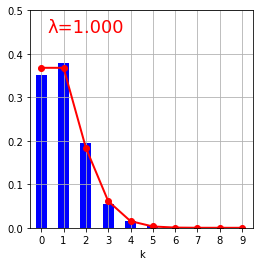

In [31]:
_ = PMF(λ=1, K=10, N=100, width=4, height=4)

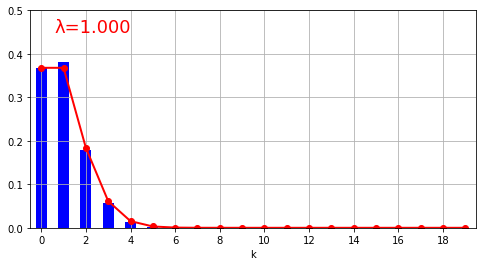

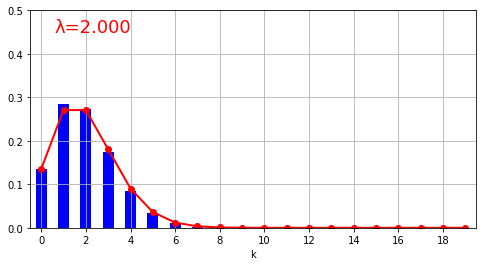

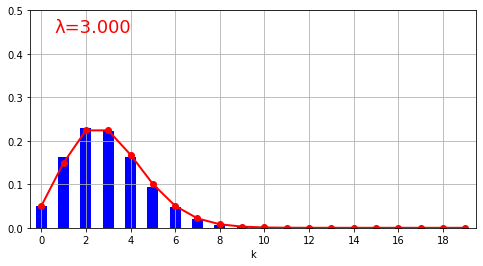

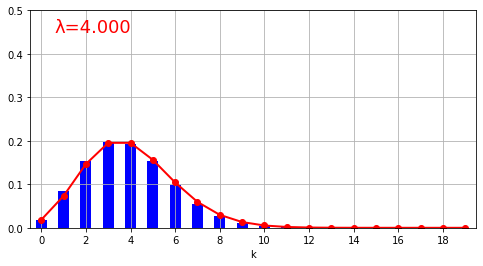

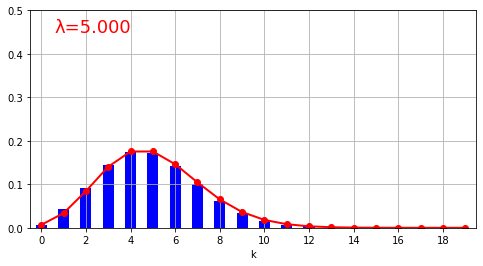

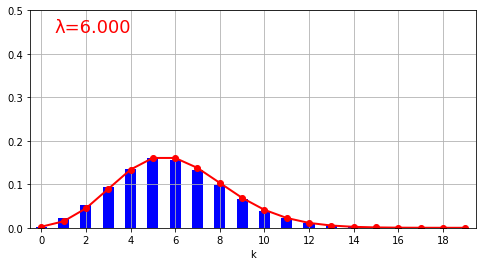

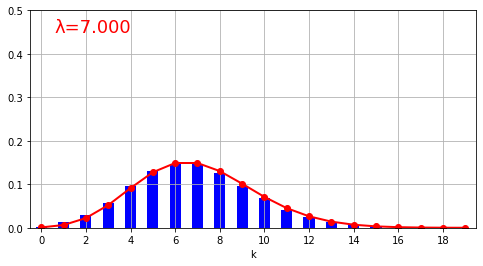

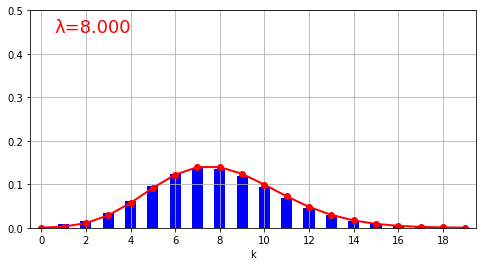

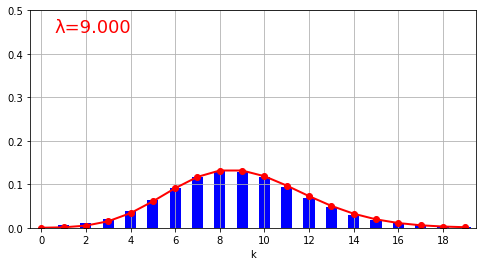

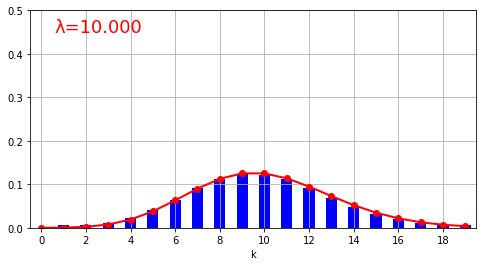

In [32]:
for i in range(1,11):
    PMF(λ=i, K=20, height=4, width=8)

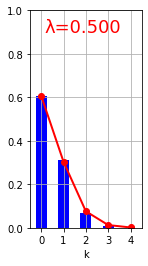

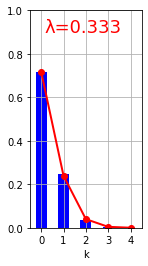

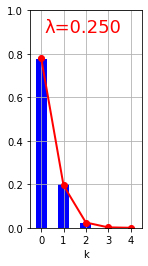

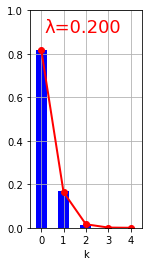

In [33]:
for i in range(2,6):
     PMF(λ=1/i, K=5, height=4, width=2)

# Impact of Unit of Measurements

## Measuring Meteor showers in minutes

[0.9200444146293233,
 0.07667036788577693,
 0.003194598661907373,
 8.873885171964917e-05,
 1.8487260774926916e-06]

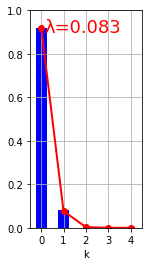

In [34]:
PMF(λ=1/12, K=5, height=4, width=2)

## Measuring Meteor showers in hours

[0.006737946999085467,
 0.03368973499542734,
 0.08422433748856832,
 0.1403738958142805,
 0.17546736976785063,
 0.17546736976785068,
 0.1462228081398754,
 0.10444486295705395,
 0.06527803934815865,
 0.036265577415643714,
 0.018132788707821854,
 0.008242176685373562,
 0.0034342402855723226,
 0.0013208616482970467,
 0.0004717363029632305,
 0.00015724543432107664,
 4.91391982253364e-05,
 1.445270536039306e-05,
 4.01464037788697e-06,
 1.0564843099702562e-06]

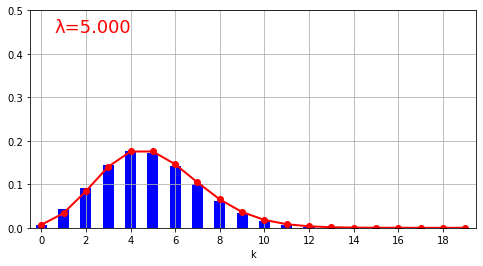

In [35]:
PMF(λ=5, K=20, height=4, width=8)

# Applications to the initial problems

## Web Server

Previously we had seen how the failure rate of the webserver with $\lambda=1/60$ could look like.
Now lets have a look how that looks like statistically:

In [36]:
poissonSimulation(λ=1/60, T=600, K=6, N=1000)

[0.9835512462985745,
 0.016317773806010485,
 0.00013097989541504046,
 0.0,
 0.0,
 0.0]

In pracical terms: on 98.3% of the days nothing will happen, i.e. the webserver is not crashing. 
However on 1.6% of the days (or about 6 times during a year) the server will crash once.

[0.9834714538216175,
 0.016391190897026963,
 0.0001365932574752246,
 7.588514304179157e-07,
 3.161880960074652e-09,
 1.0539603200248841e-11]

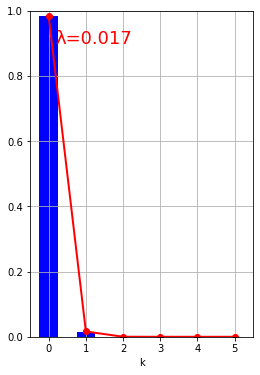

In [37]:
PMF(λ=1/60, K=6, T=600, N=100, width=4, height=6)

## Flood Events

Initially we had seen how flood events could work out for $\lambda=0.04$.

In [38]:
poissonSimulation(λ=0.04, T=200, K=6, N=1000)

[0.960937616419712,
 0.03840174052126227,
 0.0006457413358898068,
 1.4901723135918616e-05,
 0.0,
 0.0]

[0.9607894391523232,
 0.03843157756609293,
 0.0007686315513218588,
 1.0248420684291472e-05,
 1.0248420684291449e-07,
 8.198736547433178e-10]

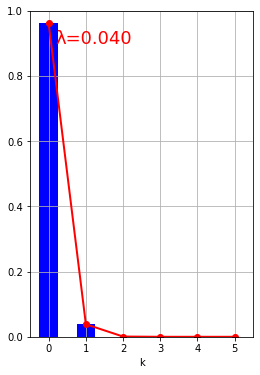

In [39]:
PMF(λ=0.04, K=6, T=200, N=1000, width=4, height=6)

## School Car Traffic

In [40]:
poissonSimulation(λ=5, T=10, K=20, N=1000)

[0.008267604295353037,
 0.05321676328043334,
 0.09930628147866578,
 0.14824669770977858,
 0.1766606481041528,
 0.16658747505464222,
 0.1339922075453768,
 0.09949634134752447,
 0.057303050460895184,
 0.03173999809940131,
 0.012543951344673572,
 0.00817257436092369,
 0.0032310177705977385,
 0.000760239475434762,
 0.000380119737717381,
 0.0,
 9.502993442934525e-05,
 0.0,
 0.0,
 0.0]

[0.006737946999085467,
 0.03368973499542734,
 0.08422433748856832,
 0.1403738958142805,
 0.17546736976785063,
 0.17546736976785068,
 0.1462228081398754,
 0.10444486295705395,
 0.06527803934815865,
 0.036265577415643714,
 0.018132788707821854,
 0.008242176685373562,
 0.0034342402855723226,
 0.0013208616482970467,
 0.0004717363029632305,
 0.00015724543432107664,
 4.91391982253364e-05,
 1.445270536039306e-05,
 4.01464037788697e-06,
 1.0564843099702562e-06]

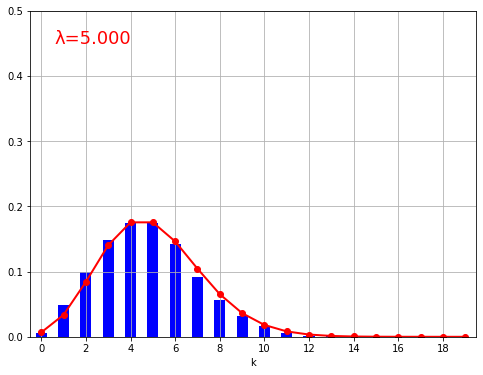

In [41]:
PMF(λ=5, K=20, T=10, N=1000, width=8, height=6)

# References

- Poisson Distribution 
  [NIST](https://www.itl.nist.gov/div898/handbook/eda/section3/eda366j.htm) 
  [Mathworld](http://mathworld.wolfram.com/PoissonDistribution.html) 
  [Wikipedia](https://en.wikipedia.org/wiki/Poisson_distribution) 
  [scipy.stats.poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)
  [Table](https://castle.eiu.edu/~aalvarado2/levine-smume6_topic_POIS.pdf)
- Poisson Point Process [Wikipedia](https://en.wikipedia.org/wiki/Poisson_point_process)
- Python [home](https://python.org) [doc](https://docs.python.org/3/)
- Pandas  [home](https://pandas.pydata.org) [doc](https://pandas.pydata.org/docs/reference/index.html)
- Matplotlib [home](https://matplotlib.org) [doc](https://matplotlib.org/api/index.html) [pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)
- SciPy [home](https://www.scipy.org) [doc](https://docs.scipy.org/doc/scipy/reference/) [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
- Standard Libraries [random](https://docs.python.org/3/library/random.html)
  [statistics](https://docs.python.org/3/library/statistics.html)